# [--- Day 10: Pipe Maze ---](https://adventofcode.com/2023/day/10)

## Setup

Use the `input` file if present, otherwise use the sample input.

In [59]:
is_sample = False

try:
  input = open("input", "r").read().splitlines()
except FileNotFoundError:
  input = """7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ"""
  input = input.split()
  is_sample = True

print(len(input))
input = [line+"." for line in input]
input.append("." * len(input[0]))
print(input)

5
['7-F7-.', '.FJ|7.', 'SJLL7.', '|F--J.', 'LJ.LJ.', '......']


## Functions and Classes



In [60]:
import igraph as ig
import matplotlib.pyplot as plt

def show_graph(graph):
  fig, ax = plt.subplots(figsize=(7, 5))
  ig.plot(
      graph,
      target=ax,
      vertex_size=30,
      vertex_frame_width=4.0,
      vertex_frame_color="white",
      vertex_label=graph.vs["name"],
      vertex_label_size=7.0,
  )
  plt.show()

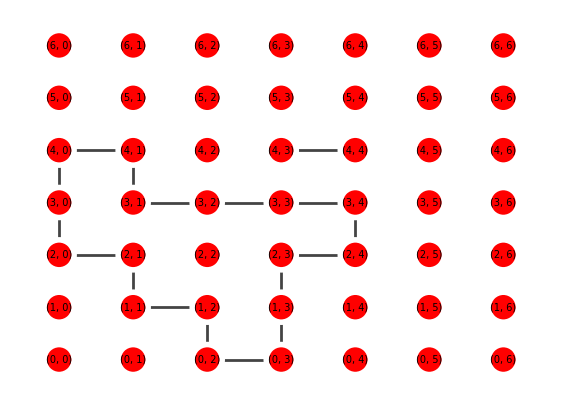

In [61]:
def get_graph(input):
  graph = ig.Graph()

  for i in range(len(input) + 1):
    for j in range(len(input[0]) + 1):
      graph.add_vertex(f"{(i, j)}", x=j, y=i)

  for i, line in enumerate(input):
    for j, char in enumerate(line):
      match char:
        case "S":
          start = (i, j)
          match input[i][j+1]:
            case "-" | "J" | "7":
              graph.add_edge(f"{(i, j)}", f"{((i), j+1)}")
          match input[i+1][j]:
            case "|" | "J" | "L":
              graph.add_edge(f"{(i, j)}", f"{((i+1), j)}")
        case "|":
          match input[i+1][j]:
            case "|" | "J" | "L" | "S":
              graph.add_edge(f"{(i, j)}", f"{((i+1), j)}")
        case "-":
          match input[i][j+1]:
            case "-" | "J" | "7" | "S":
              graph.add_edge(f"{(i, j)}", f"{((i), j+1)}")
        case "F":
          match input[i][j+1]:
            case "-" | "J" | "7" | "S":
              graph.add_edge(f"{(i, j)}", f"{((i), j+1)}")
          match input[i+1][j]:
            case "|" | "J" | "L" | "S":
              graph.add_edge(f"{(i, j)}", f"{((i+1), j)}")
        case "L":
          match input[i][j+1]:
            case "-" | "J" | "7" | "S":
              graph.add_edge(f"{(i, j)}", f"{((i), j+1)}")
        case "7":
          match input[i+1][j]:
            case "|" | "J" | "L" | "S":
              graph.add_edge(f"{(i, j)}", f"{((i+1), j)}")
  return graph, start

graph, start = get_graph(input)
show_graph(graph)


## Part 1

In [62]:
startv = graph.vs.find(name=f"{start}")
next = startv.neighbors()[0]
found = set()
points = [startv]

while next:
    found.add(next.index)
    points.append(next)
    nn = next.neighbors()
    if(len(nn) != 2):
        raise Exception("expected 2")
    if nn[0].index not in found:
        next = nn[0]
    elif nn[1].index not in found:
        next = nn[1]
    else:
        next = None

res = int(len(found)/2)
print(res)
assert( res == 6812 or res == 8)


8


## Part 2

In [63]:
from shapely.geometry import Point, Polygon

# Define the polygon vertices
polygon_vertices = []
for point in points:
   polygon_vertices.append((point["x"], point["y"]))

# Create a Shapely Polygon object
polygon = Polygon(polygon_vertices)

is_inside_count = 0
for i in range(len(input) + 1):
  for j in range(len(input[0]) + 1):
    point_coordinates = (j, i)
    point = Point(point_coordinates)
    is_inside_count += point.within(polygon)

print(is_inside_count)
assert(is_inside_count == 527 or is_inside_count == 1)

1
